##### importing libraries

In [1]:
import pandas as pd
import numpy as na
import warnings
warnings.filterwarnings('ignore')

##### loading dataset

In [2]:
df1 = pd.read_excel(r"C:\Users\91832\Downloads\data.xlsx",sheet_name = 0)
df2 = pd.read_excel(r"C:\Users\91832\Downloads\data.xlsx",sheet_name = 1)

In [3]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom
...,...,...,...,...,...,...
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,24,4.25,United Kingdom
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,3.39,United Kingdom
231,536390,84030E,ENGLISH ROSE HOT WATER BOTTLE,24,3.75,United Kingdom
232,536390,22174,PHOTO CUBE,48,1.48,United Kingdom


In [4]:
df2

,InvoiceNo,CustomerID
0,536365,17850.0
1,536365,17850.0
2,536365,17850.0
3,536365,17850.0
4,536365,17850.0
...,...,...
541904,581587,12680.0
541905,581587,12680.0
541906,581587,12680.0
541907,581587,12680.0


### treating Structural error 

In [5]:
df1

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom
1,536365,71053,WHITE METAL LANTERN,#6,3.39,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,4.23,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,5.07,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,5.91,United Kingdom
...,...,...,...,...,...,...
229,536390,21485,RETROSPOT HEART HOT WATER BOTTLE,24,4.25,United Kingdom
230,536390,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24,3.39,United Kingdom
231,536390,84030E,ENGLISH ROSE HOT WATER BOTTLE,24,3.75,United Kingdom
232,536390,22174,PHOTO CUBE,48,1.48,United Kingdom


In [15]:
df1['Quantity'] = df1['Quantity'].replace('[#*&]','',regex=True).astype('int64')
df1['Quantity']

0       6
1       6
2       8
3       6
4       6
       ..
229    24
230    24
231    24
232    48
233    96
Name: Quantity, Length: 234, dtype: int64

### Transformation of data

In [17]:
# checking missing values
df1['Quantity'].isnull().sum()

0

In [18]:
# checking range of mean and median of df1['Quantity']
df1['Quantity'].mean(),df1['Quantity'].median()

(23.22222222222222, 6.0)

<Axes: ylabel='Density'>

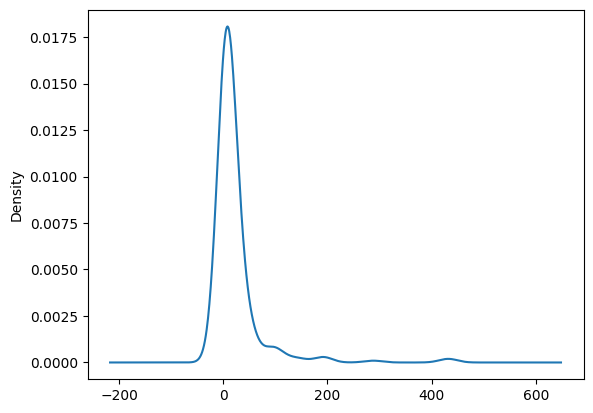

In [19]:
# checking the normalization of data using plot
df1['Quantity'].plot(kind = 'kde')

1) as the range is more the data is non-normalized
2) so we use trail and error methods using folowinng steps
* log
* square
* squareroot
* exponential

In [20]:
# usnig log
na.log(df1['Quantity'])

0      1.791759
1      1.791759
2      2.079442
3      1.791759
4      1.791759
         ...   
229    3.178054
230    3.178054
231    3.178054
232    3.871201
233    4.564348
Name: Quantity, Length: 234, dtype: float64

In [22]:
df1['log_Quantity'] = na.log(df1['Quantity'])

In [23]:
df1['log_Quantity']

0      1.791759
1      1.791759
2      2.079442
3      1.791759
4      1.791759
         ...   
229    3.178054
230    3.178054
231    3.178054
232    3.871201
233    4.564348
Name: log_Quantity, Length: 234, dtype: float64

In [25]:
df1['log_Quantity'].mean(),df1['log_Quantity'].median()

(2.1795130184661864, 1.791759469228055)

<Axes: ylabel='Density'>

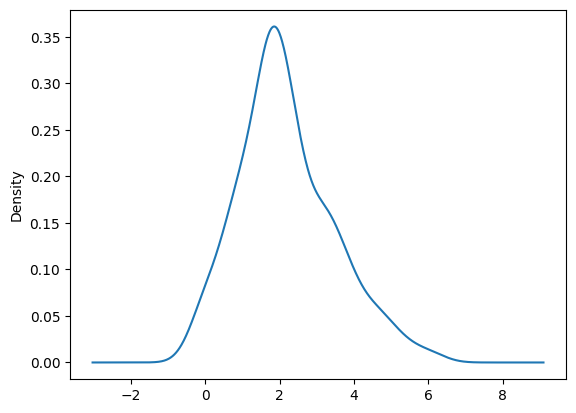

In [28]:
df1['log_Quantity'].plot(kind = 'kde')

### combination of dataframes df1&df2 

##### finding common columns in dataframes df1&df2

In [29]:
df1.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'UnitPrice',
       'Country', 'log_Quantity'],
      dtype='object')

In [30]:
df2.columns

Index(['InvoiceNo', 'CustomerID'], dtype='object')

##### using concatination

In [32]:
pd.concat([df1,df2],axis =0)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,NaN
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,United Kingdom,1.791759,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,4.23,United Kingdom,2.079442,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,5.07,United Kingdom,1.791759,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,5.91,United Kingdom,1.791759,NaN
...,...,...,...,...,...,...,...,...
541904,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
541905,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
541906,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
541907,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0


In [33]:
pd.concat([df2,df1],axis =0)

,InvoiceNo,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity
0,536365,17850.0,NaN,NaN,NaN,NaN,NaN,NaN
1,536365,17850.0,NaN,NaN,NaN,NaN,NaN,NaN
2,536365,17850.0,NaN,NaN,NaN,NaN,NaN,NaN
3,536365,17850.0,NaN,NaN,NaN,NaN,NaN,NaN
4,536365,17850.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
229,536390,NaN,21485,RETROSPOT HEART HOT WATER BOTTLE,24.0,4.25,United Kingdom,3.178054
230,536390,NaN,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,24.0,3.39,United Kingdom,3.178054
231,536390,NaN,84030E,ENGLISH ROSE HOT WATER BOTTLE,24.0,3.75,United Kingdom,3.178054
232,536390,NaN,22174,PHOTO CUBE,48.0,1.48,United Kingdom,3.871201


##### using merging

In [34]:
pd.merge(df1,df2,on = 'InvoiceNo',how = 'outer')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,17850.0
...,...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0


In [35]:
pd.merge(df1,df2,on = 'InvoiceNo',how = 'inner')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
...,...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0


In [36]:
pd.merge(df1,df2,on = 'InvoiceNo',how = 'left')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
1,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
2,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
3,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
4,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,1.791759,17850.0
...,...,...,...,...,...,...,...,...
4064,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0
4065,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0
4066,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0
4067,536390,22969,HOMEMADE JAM SCENTED CANDLES,96,1.25,United Kingdom,4.564348,17511.0


In [37]:
pd.merge(df1,df2,on = 'InvoiceNo',how = 'right')

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,log_Quantity,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2.55,United Kingdom,1.791759,17850.0
1,536365,71053,WHITE METAL LANTERN,6.0,3.39,United Kingdom,1.791759,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,4.23,United Kingdom,2.079442,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,5.07,United Kingdom,1.791759,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,5.91,United Kingdom,1.791759,17850.0
...,...,...,...,...,...,...,...,...
545738,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545739,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545740,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
545741,581587,NaN,NaN,NaN,NaN,NaN,NaN,12680.0
